<a href="https://colab.research.google.com/github/markmorr/general/blob/main/Deep_CNN_Image_Colorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import numpy as np
import tensorflow as tf
import math
import timeit
import matplotlib.pyplot as plt
from six.moves import cPickle as pickle
import os
import platform
from subprocess import check_output
import keras
import scipy as sp
import seaborn as sns
import tensorflow as tf
import tqdm
from keras import regularizers
from keras.callbacks import ModelCheckpoint
from keras.datasets import cifar10
from keras.layers import (
    Activation,
    Conv2D,
    Dense,
    Dropout,
    Flatten,
    MaxPooling2D,
    Reshape,
    Softmax,
)


In [50]:
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from scipy.spatial.distance import euclidean
from scipy.spatial import distance
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import train_test_split
from sklearn.neighbors import DistanceMetric
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow.python.client import device_lib
from keras.datasets import cifar10

import random
from random import randrange
print('imports done')


imports done


In [51]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [52]:
#part b ##############
def collect_all_birds(images,labels):
   
    indexes = np.argwhere(labels == 2)
    indexes = indexes[:,0]
    #it yields a 2 column array for some reason--just extract the first one
    index_list = list(indexes)
    #for i in index_list: didn't work
     # samples = x[i]
    samples = [images[i] for i in index_list]
    return samples


x_train_ = collect_all_birds(x_train, y_train)
x_test_ = collect_all_birds(x_test, y_test)
print(x_train.size)

153600000


In [53]:
#print shape to prove it's the right shape!*

#print shape to show it worked in google colab
tb = np.concatenate((x_train, x_test))
print(tb.size)

#thanks for the helpful error message numpy

184320000


In [54]:
RGB_vectors = np.zeros(shape=(6000,3))
#tb is the whole dataset (train + test) of birds
#using all of the pixels now in a for loop--for each pixel in each image, this is just picking the final pixel in each image
#this is not really randomly drawing--> it picks the bottom right pixel as our dataset of RGB colors to find clusters in
#fairly inefficient too
import random
for i in range(0,6000):
  j = random.randint(0,31) #randint is inclusive on the range
  k = random.randint(0,31)
  RGB_vectors[i] = tb[i][j][k]

print(RGB_vectors.shape)
print('An example RGB vector: {}'.format(RGB_vectors[0]))


(6000, 3)
An example RGB vector: [145. 123.  38.]


In [55]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, random_state=0).fit(RGB_vectors)
kmeans_output = kmeans.labels_   
main_colors = kmeans.cluster_centers_ #this  is poorly named

import math
from scipy.spatial import distance
tetrachrome = np.zeros(shape=(6000,32,32,3))
#convert to integers 
main_colors = main_colors.astype(int)
print(main_colors)
print('Each row is an RGB vector depicting one of the main colors found by KMeans')
print('These color clusters will now serve as the 4 output classes')

[[158 156 145]
 [ 46  43  39]
 [215 219 219]
 [108 103  86]]
Each row is an RGB vector depicting one of the main colors found by KMeans
These color clusters will now serve as the 4 output classes


In [56]:
#Recolorizing every single image in the dataset now, pixel by pixel  
 #finding the k class color that minimizes the euclidean distance between the old pixel and the output color
tetra = np.zeros(shape=(6000,32,32,4))
for i in range(0,6000):
    for j in range(0,32):
        for k in range(0,32):
            current_minimum_dist = float('inf') #just a stand-in large number.maybe replace with 441.67 for now
            best_color_index = 0
            for u in range(0,4):
                
                dist = distance.euclidean(tb[i][j][k], main_colors[u])
                if dist < current_minimum_dist:
                    current_minimum_dist = dist
                    best_color_index = u
            tetrachrome[i][j][k] = main_colors[best_color_index]
            tetra[i][j][k][best_color_index] = 1
            
print('done!!!!!!!!!')


done!!!!!!!!!


In [57]:
# import pdb
# from scipy.spatial import cKDTree
# # Input image : img
# colors = main_colors
# out_img = colors[cKDTree(colors).query(tb,k=1)[1]]
# print(out_img.shape)
# print(out_img)

In [58]:
tetrachrome = tetrachrome.astype(int) #necessary? yes
numTrain, imgRows, imgCols, imgChannels = x_train.shape
print(imgRows)
print(imgCols)
for x in range(0,10):
  print(tetrachrome[x][0][0]) #just printing the upper left pixel of every image
  
# for x in range(0,10):
#   print(out_img[x][0][0]) #just printing the upper left pixel of every image
for x in range(0,10):
  print(tetra[x][0][0]) #just printing the upper left pixel of every image

32
32
[46 43 39]
[158 156 145]
[215 219 219]
[46 43 39]
[158 156 145]
[108 103  86]
[158 156 145]
[46 43 39]
[158 156 145]
[108 103  86]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]


first 10 images


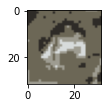

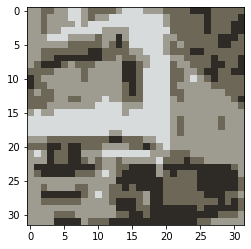

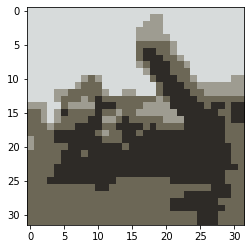

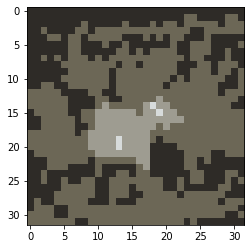

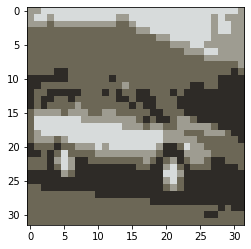

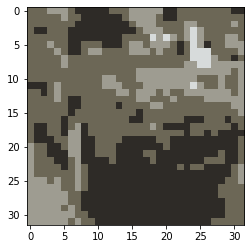

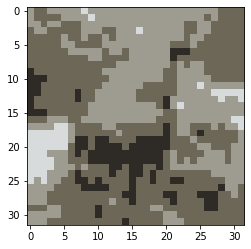

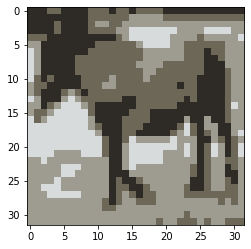

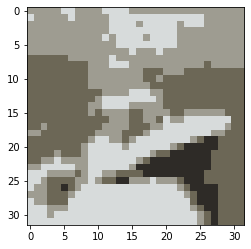

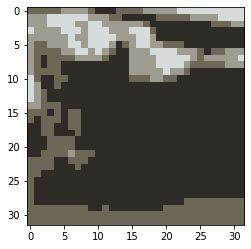

In [59]:
print("first 10 images")
fig = plt.figure(figsize = (9,3))
for i in range(0,10):
    ax = fig.add_subplot(2,5,i+1)
    plt.imshow(tetrachrome[i])
    plt.show()

#ok so gotta 

(6000, 32, 32)


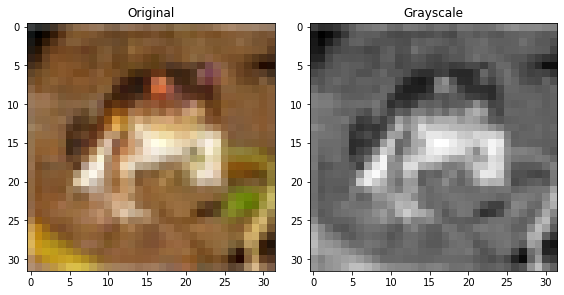

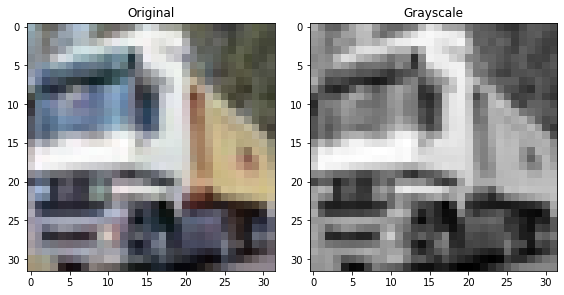

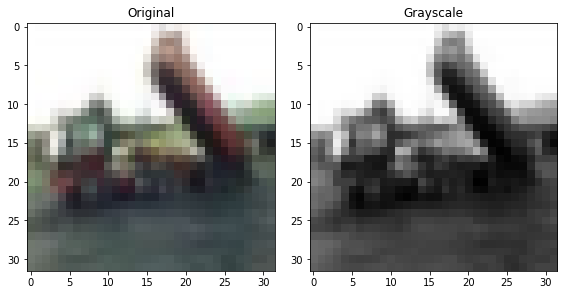

In [60]:
#source: https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_rgb_to_gray.html
#Part e 
from skimage.color import rgb2gray
grayscale = np.zeros(shape = (6000,32,32))

for i in range(0,6000):
    original = tb[i]
    grayscale[i] = rgb2gray(original)
print(grayscale.shape)

for i in range(0,3):
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    ax = axes.ravel()
    
    ax[0].imshow(tb[i])
    ax[0].set_title("Original")
    ax[1].imshow(grayscale[i], cmap=plt.cm.gray)
    ax[1].set_title("Grayscale")
    
    fig.tight_layout()
    plt.show()
    

    


In [61]:
#using resource: https://keras.io/examples/cifar10_cnn/

epochs = 5
number_of_classes = 4
from keras.utils import to_categorical
#one-hot encode target column
#y_train = to_categorical(y_train)
#y_test = to_categorical(y_test)
print(x_train.shape[1:])

model = Sequential()
#sequential lets us build the model layer by layer

#first layer
##################################################
# model.add(Conv2D(32, (5,5), padding='same',
#                  input_shape=x_train.shape[1:]))
#why does it have to be shape[1:]?
model.add(Conv2D(32, (5,5), padding='same',
                 batch_size = 6000, input_shape=(32,32,1))) #add dim 1 because it helps keras?
##################################################
model.add(Activation('relu'))



#2nd layer
# model.add(Conv2D(32, (5,5), padding='same'))
# model.add(Activation('relu'))
#ConV2D because our images are represented 2D; 5x5 is the mask shape (filter shape?)

#3rd layer (MLP??)
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.4))

#4th layer
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.4))

#######################################
model.add(Flatten())
# model.add(Dense(512)) #(this is half of 32 *32, not sure what that means)
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(number_of_classes))
#######################################

#######################################
model.add(Dense(4096, activation='softmax')) #i think this is right and it's activation will be softmax
#######################################
# model.add(Activation('softmax'))
#softmax output

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.001, decay=1e-6)

# it didn't like loss = cross_entropy for some reason!
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.summary()
print('model compiled')


(32, 32, 3)
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (6000, 32, 32, 32)        832       
_________________________________________________________________
activation_2 (Activation)    (6000, 32, 32, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (6000, 32768)             0         
_________________________________________________________________
dense_14 (Dense)             (6000, 4096)              134221824 
Total params: 134,222,656
Trainable params: 134,222,656
Non-trainable params: 0
_________________________________________________________________
model compiled


In [65]:
colors = 4
model = Sequential()
model.add(Conv2D(128, 
                    kernel_size=(5, 5), 
                    strides=1, 
                    input_shape=(32, 32, 1),
                    padding='same',
                    activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),
                          padding='same'))

model.add(Conv2D(128, 
                    kernel_size=(5, 5),
                    strides=1, 
                    padding='same',
                    activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),
                          padding='same'))

#############################################
model.add(Conv2D(128, 
                    kernel_size=(5, 5),
                    strides=1, 
                    padding='same',
                    activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),
                          padding='same'))
##############################################

#############################################
model.add(Conv2D(128, 
                    kernel_size=(5, 5),
                    strides=1, 
                    padding='same',
                    activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),
                          padding='same'))
##############################################

model.add(Flatten())

model.add(Dense(2048, 
                   activation = 'relu'))

#############################################
model.add(Dense(2048, 
                   activation = 'relu'))
##############################################

#############################################
model.add(Dense(2048, 
                   activation = 'relu'))
##############################################

model.add(Dense(1024*colors, 
                   activation = 'softmax'))

model.summary()
# model.compile(optimizer=opt, 
#                  loss='categorical_crossentropy', 
#                  metrics=['accuracy'])


# keras.optimizers.Adam(lr=0.000000001)
opt = tf.keras.optimizers.SGD(learning_rate=0.000001)
model.compile(optimizer=opt, 
                 loss='categorical_crossentropy', 
                 metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 128)       3328      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 128)       409728    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 8, 8, 128)         409728    
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 4, 4, 128)        

In [66]:
#Issues running
from keras.utils import to_categorical

print('training')
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
print(grayscale.shape)
print(greyTrainBirdFeatures.shape)
print(pixelMainColors.shape)
grayscale_train = grayscale[:5000]
grayscale_test = grayscale[5000:6000]
grayscale_test2 = grayscale_test[:,:,:,np.newaxis]
print(grayscale_train.shape)
grayscale_train2 = grayscale_train[:,:,:,np.newaxis]
print(grayscale_train2.shape)
print('\n\n')
print(pixelMainColors.shape)
print(cifarDataX.shape[0])
tetra_train = tetra[:5000]
tetra_train = np.array(tetra_train)
tetra_train = np.reshape(tetra_train, (5000, 32*32*4))
##############################################
trained_network = model.fit(grayscale_train2, 
                       tetra_train,
                       epochs=20, 
                       shuffle=True,
                       verbose=1,
                       validation_split=0.1)
################################################

# test_scores = model.evaluate(x_test, y_test, verbose=1)
# print('Test loss:', test_scores[0])
# print('Test accuracy:', test_scores[1])


training
(6000, 32, 32)
(5000, 32, 32, 1)
(6000, 4096)
(5000, 32, 32)
(5000, 32, 32, 1)



(6000, 4096)
6000
Epoch 1/20
141/141 [==============================] - 2s 14ms/step - loss: 8517.3855 - accuracy: 0.0000e+00 - val_loss: 8517.3857 - val_accuracy: 0.0000e+00
Epoch 2/20
141/141 [==============================] - 2s 11ms/step - loss: 8517.3784 - accuracy: 0.0000e+00 - val_loss: 8517.3799 - val_accuracy: 0.0000e+00
Epoch 3/20
141/141 [==============================] - 2s 11ms/step - loss: 8517.3743 - accuracy: 0.0000e+00 - val_loss: 8517.3770 - val_accuracy: 0.0000e+00
Epoch 4/20
141/141 [==============================] - 2s 11ms/step - loss: 8517.3709 - accuracy: 0.0000e+00 - val_loss: 8517.3711 - val_accuracy: 0.0000e+00
Epoch 5/20
141/141 [==============================] - 2s 11ms/step - loss: 8517.3691 - accuracy: 0.0000e+00 - val_loss: 8517.3662 - val_accuracy: 0.0000e+00
Epoch 6/20
141/141 [==============================] - 2s 11ms/step - loss: 8517.3635 - accuracy: 0.0000e+0

In [ ]:

plt.plot(trained_network.history['loss'], label='Training Loss')
plt.plot(trained_network.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
grayscale_test = grayscale[5000:6000]
grayscale_test2 = grayscale_test[:,:,:,np.newaxis]
# predictedNNTest =  trained_network.predict(greyTestBirdFeatures[:10])
predictions_on_test =  model.predict(grayscale_test2[:10])

predictedTestImages = np.reshape(predictions_on_test,(10240, colors))
outputImages = []
for pixel in predictedTestImages:
    outputImages.append(main_colors[np.argmax(pixel)])
outputImages = np.reshape(outputImages,(10,32,32,3))